In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [2]:
data = pd.read_excel("EastWestAirlines.xlsx", sheet_name="data", index_col=0)

In [3]:
data.shape

(3999, 11)

In [4]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
data.tail()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1
4020,54899,0,1,1,1,500,1,500,1,1401,0
4021,3016,0,1,1,1,0,0,0,0,1398,0


In [6]:
# rename the Award? column
data.rename(columns={'Award?' : 'award'}, inplace=True)

In [7]:
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [9]:
data.duplicated().sum()

1

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.reset_index(drop=True, inplace=True)

In [12]:
# check the number of unique values in each column
data.nunique()

Balance              3904
Qual_miles            164
cc1_miles               5
cc2_miles               3
cc3_miles               5
Bonus_miles          2734
Bonus_trans            57
Flight_miles_12mo     343
Flight_trans_12        35
Days_since_enroll    2820
award                   2
dtype: int64

In [13]:
# print the unique values in each column to see invalid data point
for i in data.columns:
    print({i:data[i].unique()})

{'Balance': array([28143, 19244, 41354, ..., 73597, 54899,  3016], dtype=int64)}
{'Qual_miles': array([    0,  2024,   500,   967,  5031,  1182,  1776,  1745,   733,
        2398,  1250,  2706,  2998,  2556,  6727,  1374,  1952,  2000,
        1178,  7210,  2015,  2066,  2128,  2919,  1024,   589,  2880,
        3445,   862,  8264,  1604,  2975,   588,  1199,  2586,  3490,
        5051,  1115,   810,  4081,  2376,   948,  6286,  2253,  2565,
        2643,  8559,  3818,  8753,  9325,  4301,  1094,  3692,  1896,
        1000,  1388,  4116,  2505, 11148,   888, 10098,   745,  5124,
        2408,   867,  1846,  1514,  8019,   763,  4924,  1697,  1739,
        2370,  6168,   925,  2288,  1467,  1704,  2329,  1099,  1505,
        6920,  2139,  4481,  1448,   250,   783,  2360,  2364,  2396,
        1362,  5583,  1440,  5009,   909,  2395,  3867,  1452,  6057,
        2081,  1112,  2704,  7663,  3953,  5513,  2454,   957,  4704,
        7558,  2562,  4727,  5368,  1754,   651, 10074,  2900,  

In [14]:
# chekc by printing the values of each column where categories less than or equal to 5
for i in data.columns:
    if data[i].nunique() <= 5:
        print({i:data[i].unique()})

{'cc1_miles': array([1, 4, 3, 2, 5], dtype=int64)}
{'cc2_miles': array([1, 2, 3], dtype=int64)}
{'cc3_miles': array([1, 3, 2, 4, 5], dtype=int64)}
{'award': array([0, 1], dtype=int64)}


In [15]:
# check by printing the values count of each column where categories less than or equal to 5
for i in data.columns:
    if data[i].nunique() <= 5:
        print({i:data[i].value_counts()})

{'cc1_miles': cc1_miles
1    2288
3     613
4     525
5     288
2     284
Name: count, dtype: int64}
{'cc2_miles': cc2_miles
1    3955
2      28
3      15
Name: count, dtype: int64}
{'cc3_miles': cc3_miles
1    3980
4       6
5       5
3       4
2       3
Name: count, dtype: int64}
{'award': award
0    2517
1    1481
Name: count, dtype: int64}


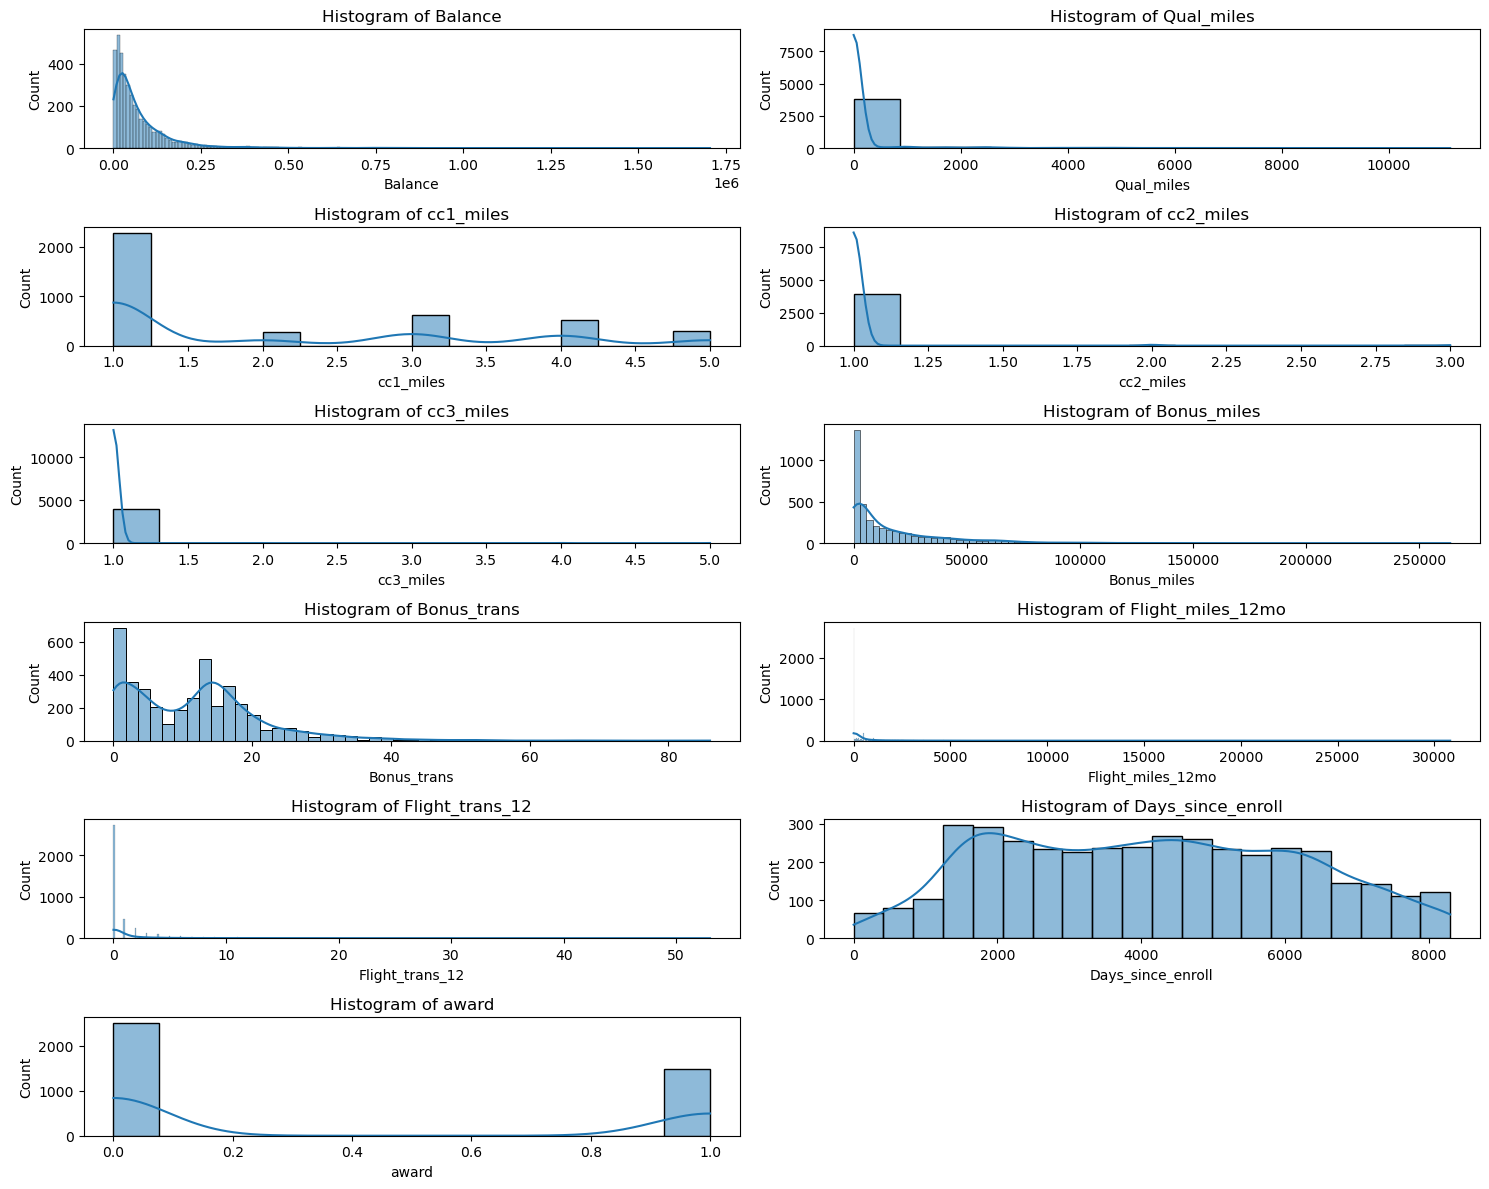

In [16]:
# Histogram for all columns
n_cols = 2  # Number of columns in the subplot grid
n_rows = (len(data.columns) + n_cols - 1) // n_cols  # Calculate the number of rows required

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 2 * n_rows))
axes = axes.flatten()

for i, column in enumerate(data.columns):
    sns.histplot(data=data, x=column, ax=axes[i], kde=True)
    axes[i].set_title(f"Histogram of {column}")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

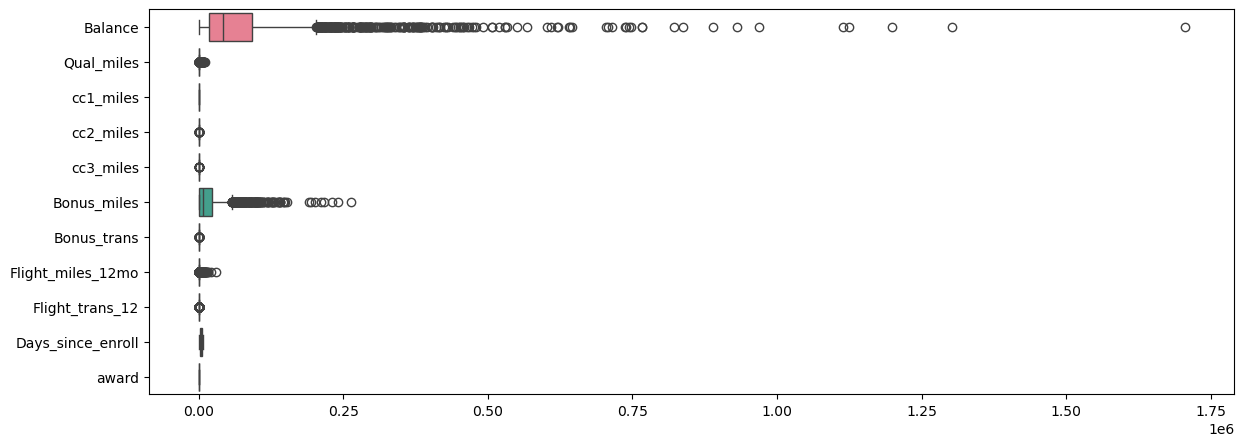

In [17]:
# boxplot for all columns
fig = plt.figure(figsize=(14,5))
sns.boxplot(data=data, orient="h")
plt.show()

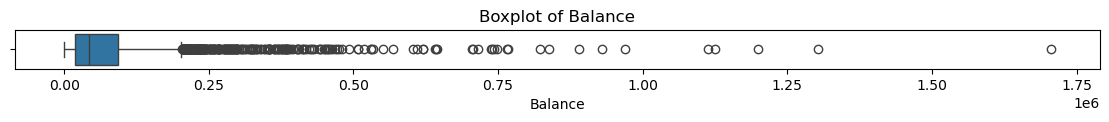

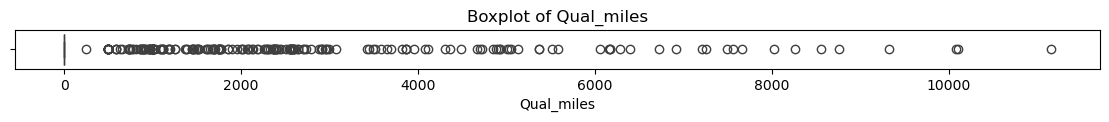

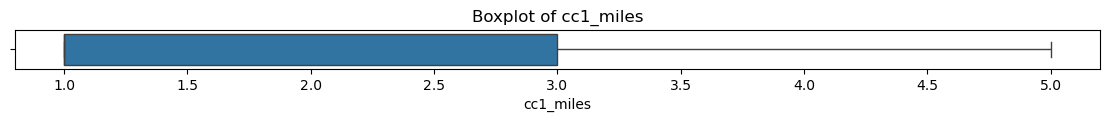

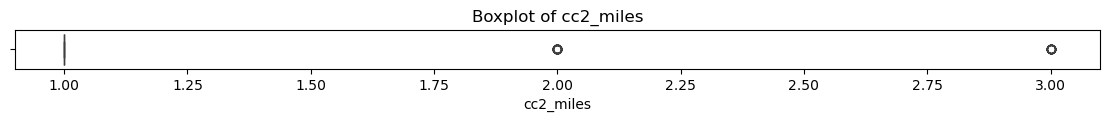

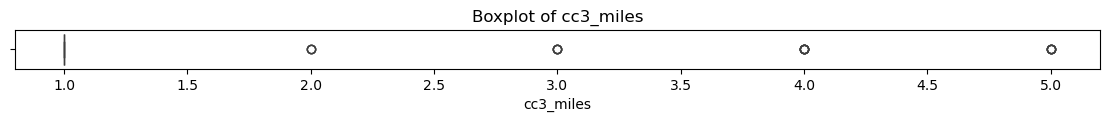

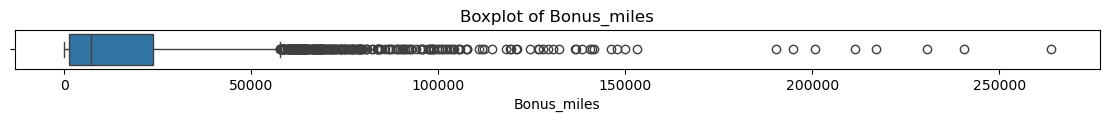

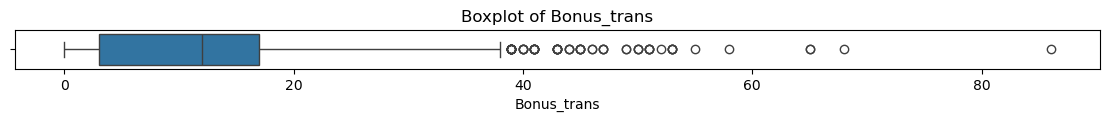

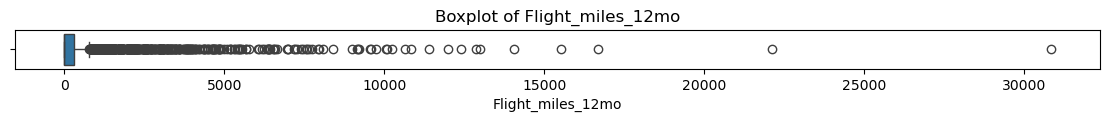

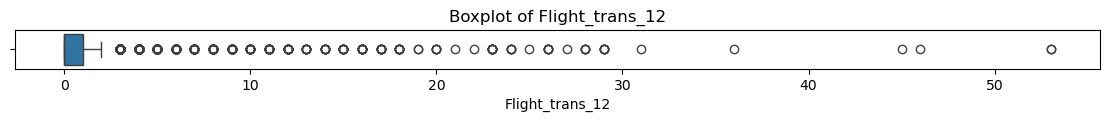

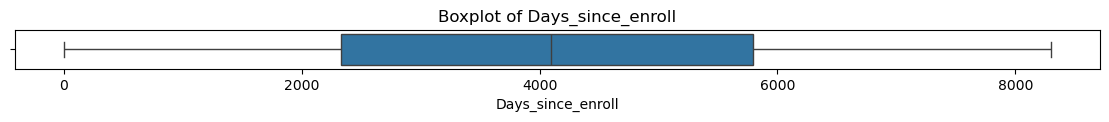

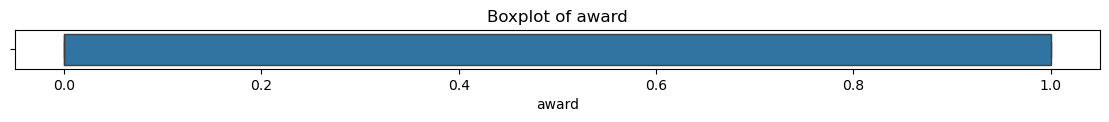

In [18]:
# seperate boxplot for each column
for column in data.columns:
    fig = plt.figure(figsize=(14, 0.5))
    sns.boxplot(data=data, x=column)
    plt.title(f"Boxplot of {column}")
    plt.show()

In [19]:
# pairplot to see the relation between all variables
#sns.pairplot(data,hue='award')
#plt.show()

In [20]:
# correlation matrix
data.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
Balance,1.000000,0.108696,0.338252,-0.008822,0.035234,0.403410,0.324797,0.217509,0.255656,0.262975,0.178380
Qual_miles,0.108696,1.000000,0.007896,-0.013928,-0.007782,0.030990,0.050678,0.126761,0.143990,0.017259,0.095228
cc1_miles,0.338252,0.007896,1.000000,-0.068247,0.060548,0.825177,0.608867,0.037310,0.041267,0.230674,0.335358
cc2_miles,-0.008822,-0.013928,-0.068247,1.000000,-0.006168,-0.003987,0.064381,0.010590,0.028276,-0.005838,0.005314
cc3_miles,0.035234,-0.007782,0.060548,-0.006168,1.000000,0.204136,0.097312,-0.001783,-0.001122,0.010815,0.023474
Bonus_miles,0.403410,0.030990,0.825177,-0.003987,0.204136,1.000000,0.603114,0.183492,0.185211,0.210232,0.373421
Bonus_trans,0.324797,0.050678,0.608867,0.064381,0.097312,0.603114,1.000000,0.377190,0.432341,0.160953,0.333747
Flight_miles_12mo,0.217509,0.126761,0.037310,0.010590,-0.001783,0.183492,0.377190,1.000000,0.869189,0.037178,0.217671
Flight_trans_12,0.255656,0.143990,0.041267,0.028276,-0.001122,0.185211,0.432341,0.869189,1.000000,0.059161,0.247862
Days_since_enroll,0.262975,0.017259,0.230674,-0.005838,0.010815,0.210232,0.160953,0.037178,0.059161,1.000000,0.187936


In [21]:
# correlation of balance with other columns
data.corr()["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403410
cc1_miles            0.338252
Bonus_trans          0.324797
Days_since_enroll    0.262975
Flight_trans_12      0.255656
Flight_miles_12mo    0.217509
award                0.178380
Qual_miles           0.108696
cc3_miles            0.035234
cc2_miles           -0.008822
Name: Balance, dtype: float64

In [22]:
# correlation of cc1_miles with other variables
data.corr()["cc1_miles"].sort_values(ascending=False)

cc1_miles            1.000000
Bonus_miles          0.825177
Bonus_trans          0.608867
Balance              0.338252
award                0.335358
Days_since_enroll    0.230674
cc3_miles            0.060548
Flight_trans_12      0.041267
Flight_miles_12mo    0.037310
Qual_miles           0.007896
cc2_miles           -0.068247
Name: cc1_miles, dtype: float64

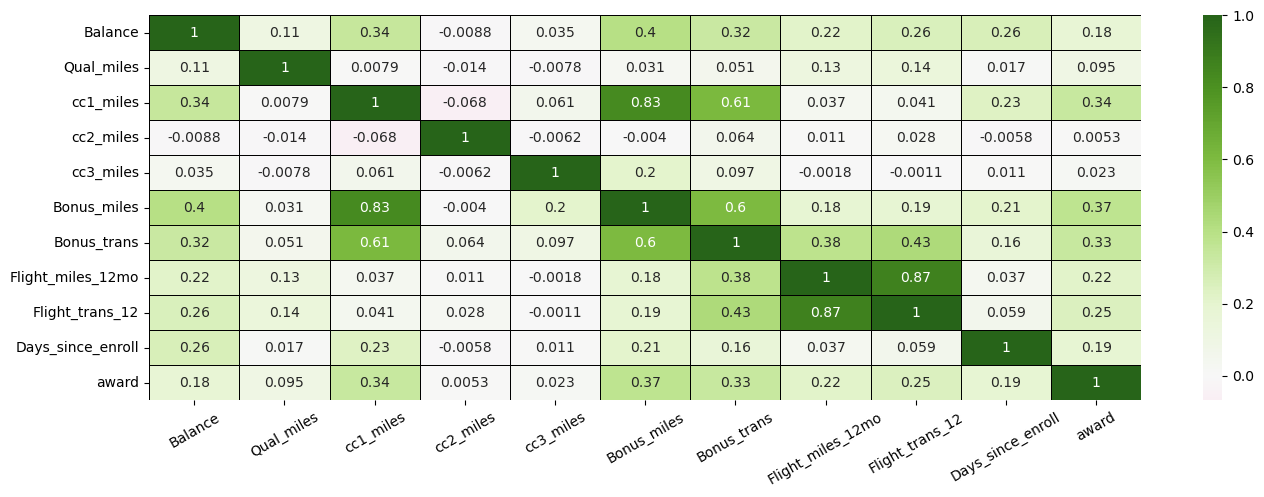

In [23]:
# correlation heatmap
fig = plt.figure(figsize=(16,5))
sns.heatmap(data.corr(),cmap='PiYG',center=0,annot=True,linewidths=0.5,linecolor='black')
plt.xticks(rotation=30)
plt.show()

In [24]:
# cc1_miles have strong positive correlation with Bonus_miles
# cc1_miles have moderate positive correlation with Bonus_trans
# Bonus_miles have moderate positive correlation with Bonus_trans
# Flight_miles_12mo have srong positive correlation with Flight_trans_12

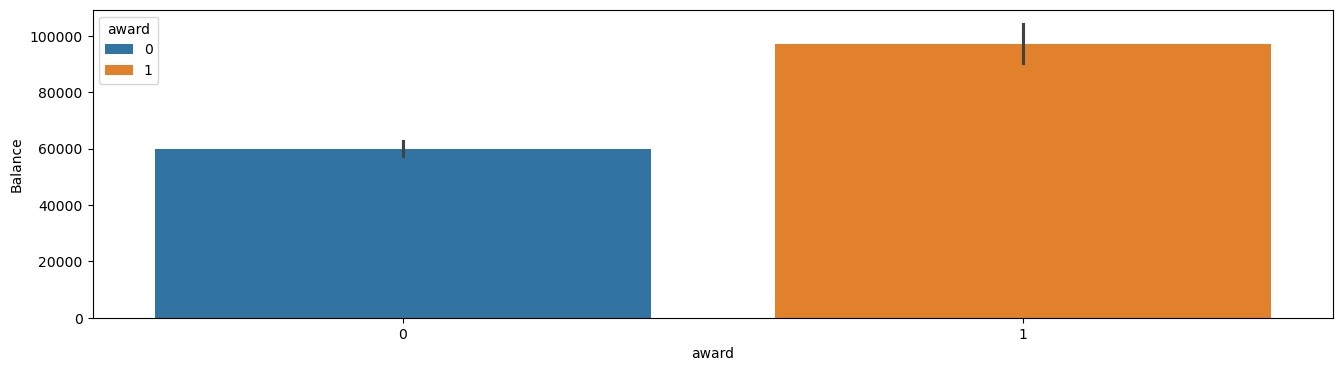

In [25]:
# barplot to show the award required for minimum balance
fig = plt.figure(figsize=(16,4))
sns.barplot(data=data,x='award',y='Balance',hue='award')
plt.show()

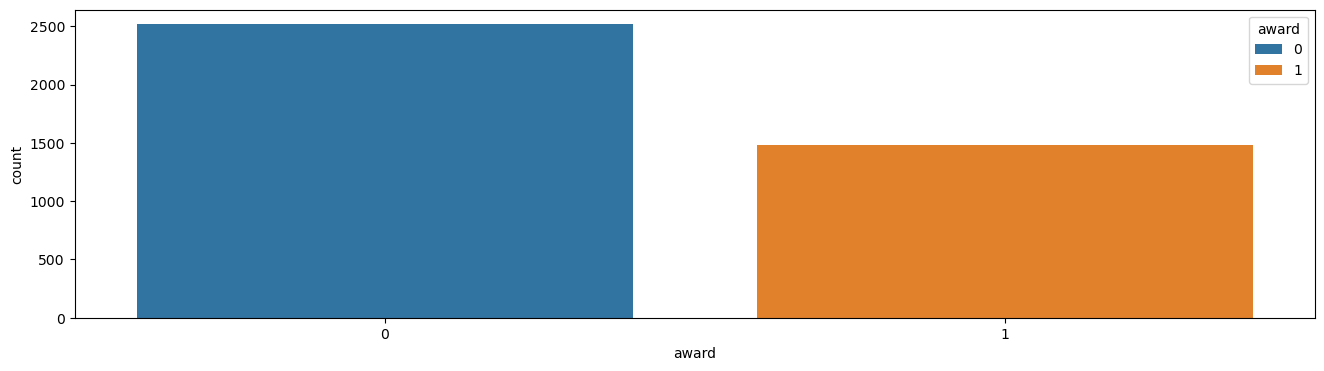

In [26]:
# countplot show the number of non award are more
fig = plt.figure(figsize=(16,4))
sns.countplot(data=data,x='award',hue='award')
plt.show()

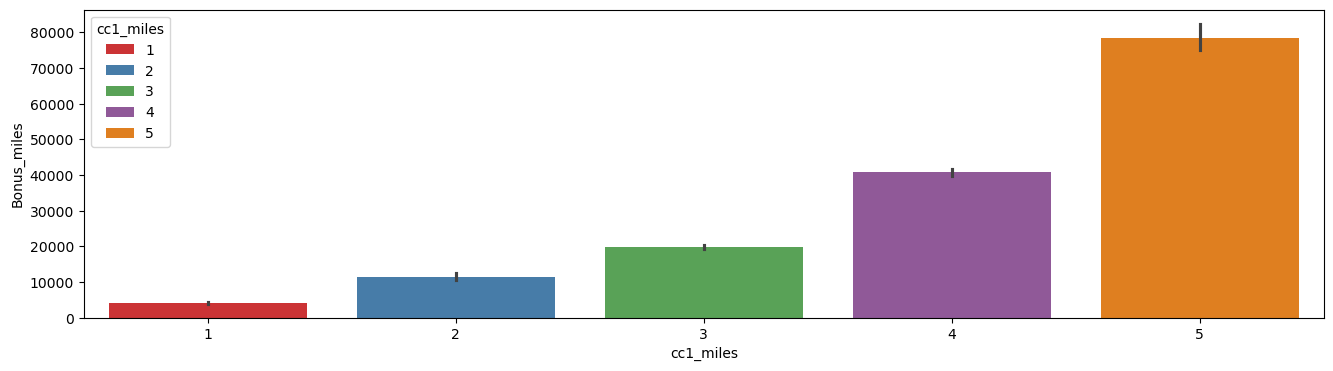

In [27]:
# barplot
fig = plt.figure(figsize=(16,4))
sns.barplot(data=data,x='cc1_miles',y='Bonus_miles',palette='Set1',hue='cc1_miles')
plt.show()

In [28]:
# more transaction earned by frequent flyer credit card is through non-flight bonus transcations

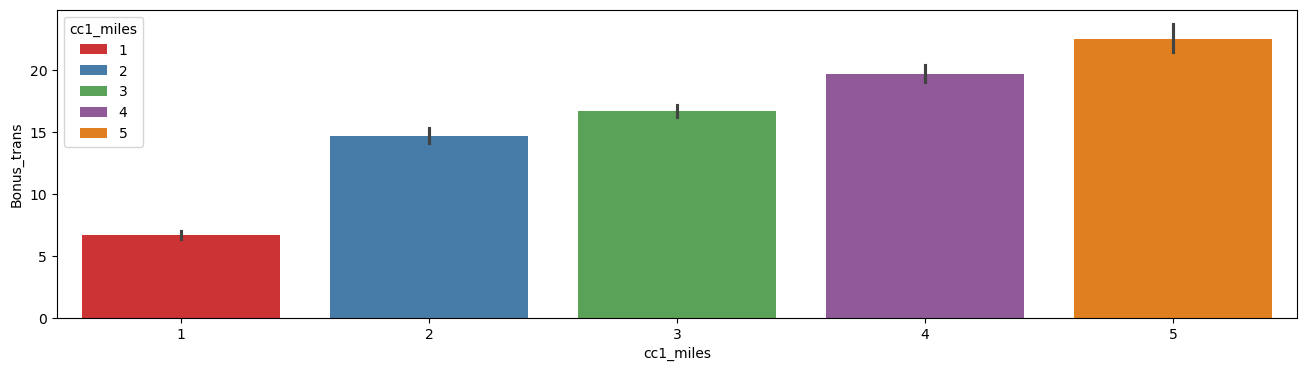

In [29]:
# barplot
fig = plt.figure(figsize=(16,4))
sns.barplot(data=data,x='cc1_miles',y='Bonus_trans',palette='Set1',hue='cc1_miles')
plt.show()

In [30]:
# more miles earned by frequent flyer credit card is by non-flight bonus transaction

In [31]:
data.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
award                0
dtype: int64

In [32]:
# function to handle outliers
def handle_outliers(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        
        data[column] = data[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

In [33]:
# calling the function to handle outliers
handle_outliers(data, ['Balance','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12'])

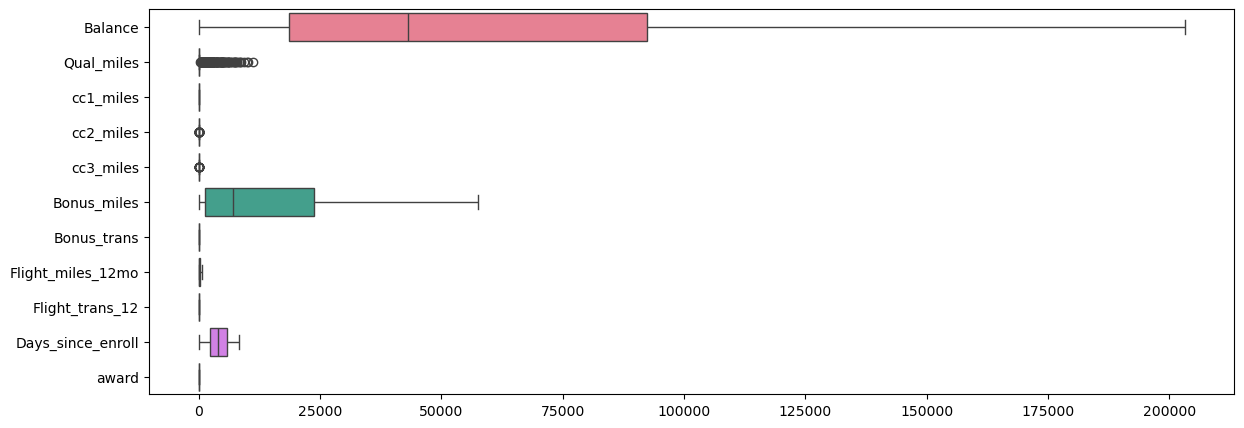

In [34]:
# boxplot for all columns after handling outliers
fig = plt.figure(figsize=(14,5))
sns.boxplot(data=data, orient="h")
plt.show()

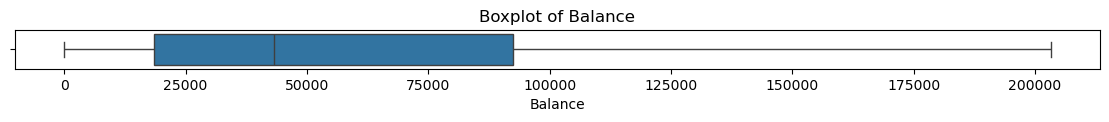

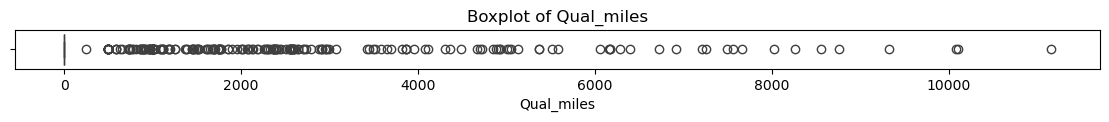

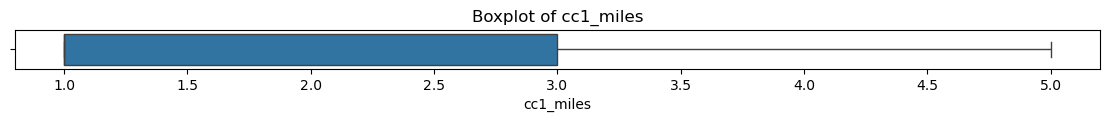

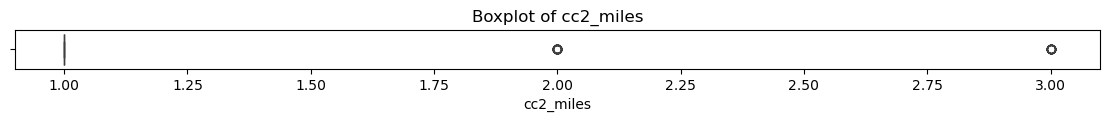

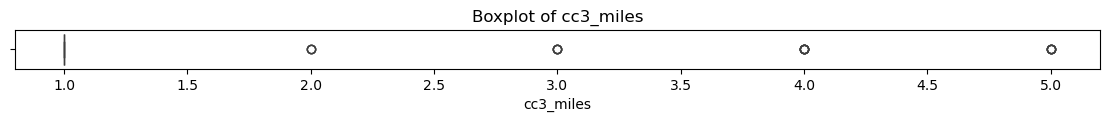

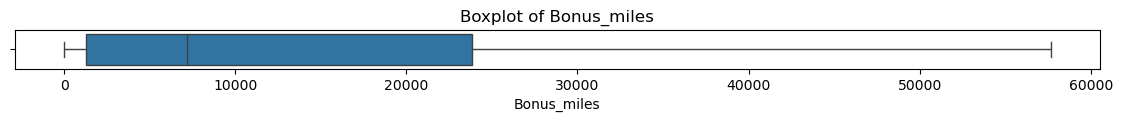

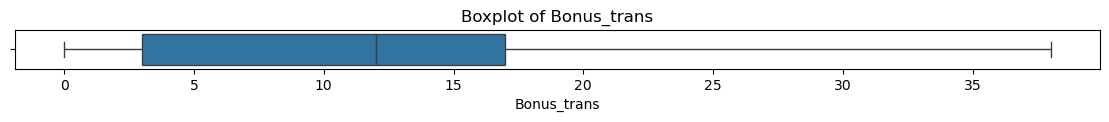

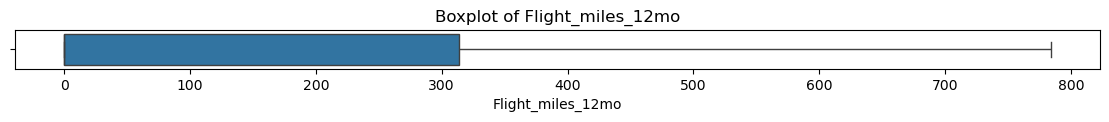

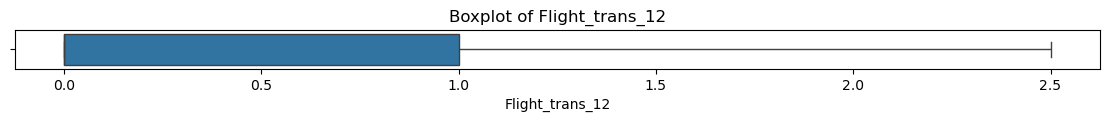

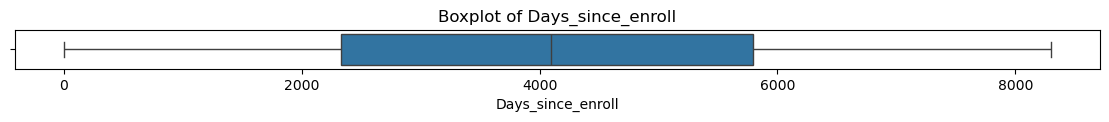

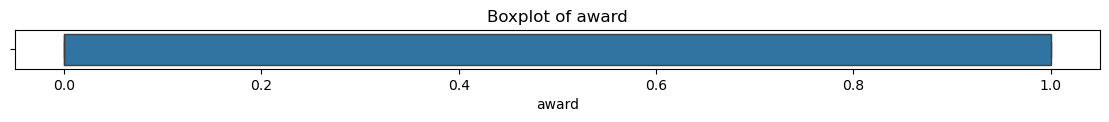

In [35]:
# seperate boxplot for each column after handling outliers
for column in data.columns:
    fig = plt.figure(figsize=(14, 0.5))
    sns.boxplot(data=data, x=column)
    plt.title(f"Boxplot of {column}")
    plt.show()

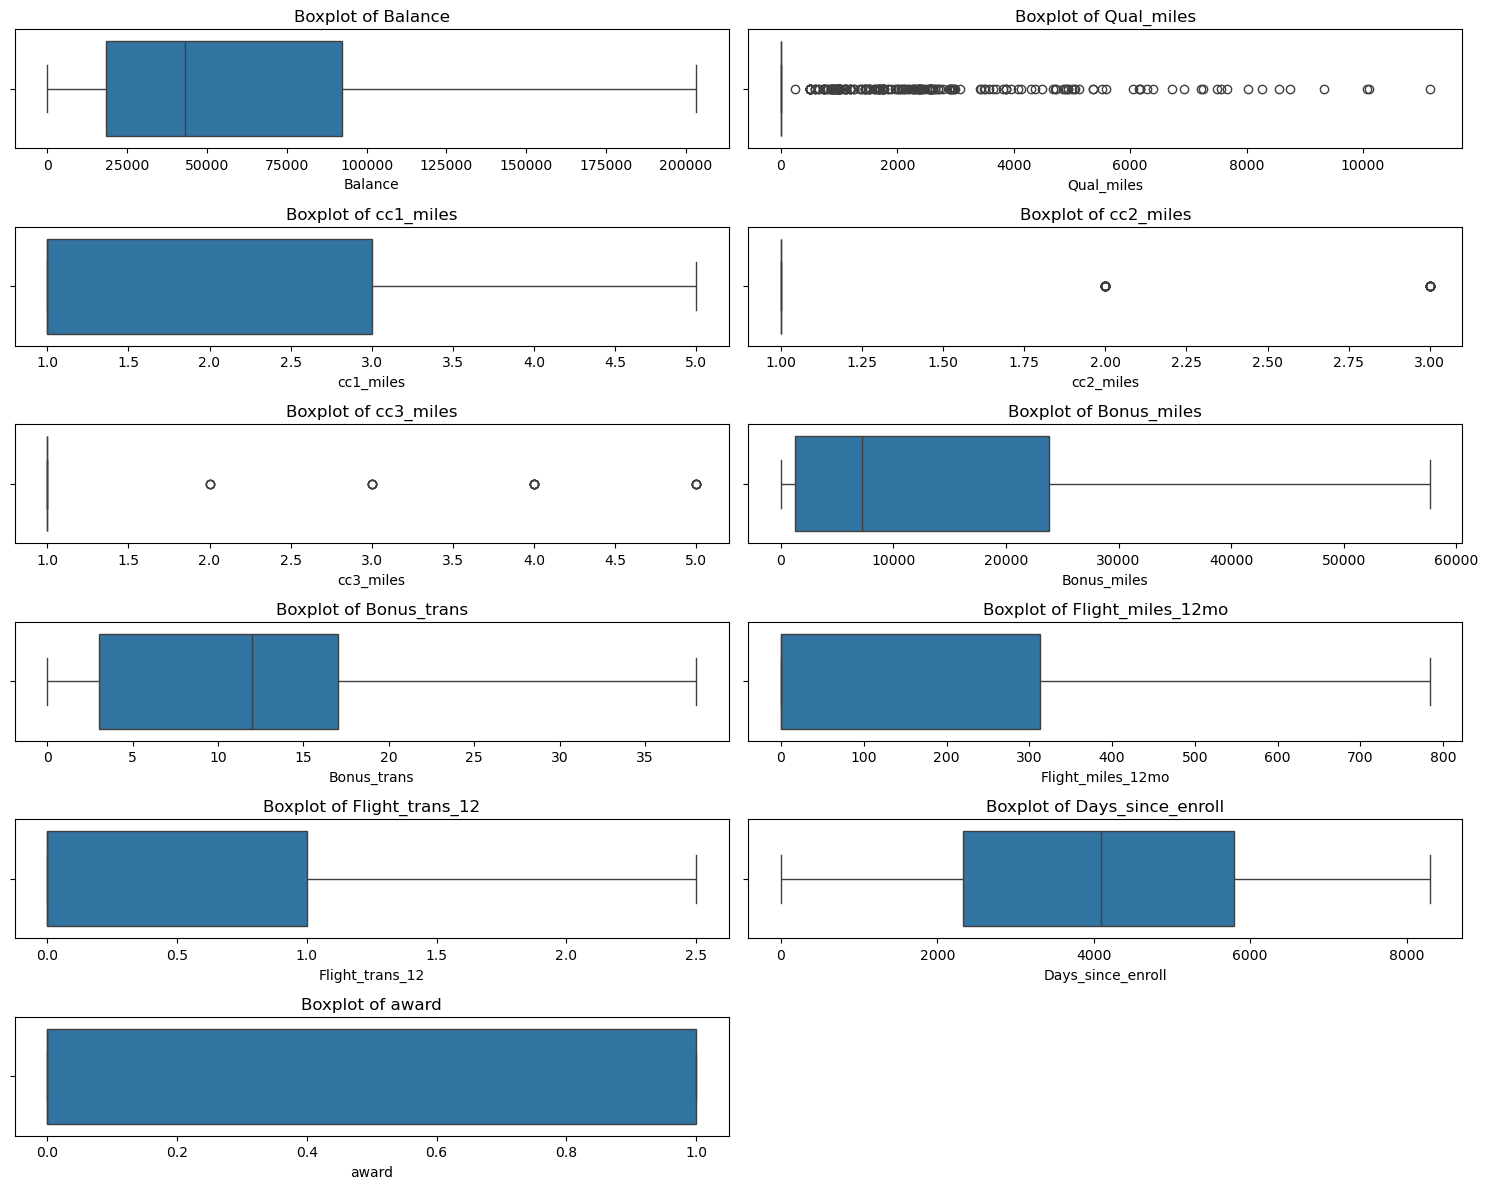

In [36]:
# boxplot for all columns after handling outliers
n_cols = 2  # Number of columns in the subplot grid
n_rows = (len(data.columns) + n_cols - 1) // n_cols  # Calculate the number of rows required

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 2 * n_rows))
axes = axes.flatten()

for i, column in enumerate(data.columns):
    sns.boxplot(data=data, x=column, ax=axes[i])
    axes[i].set_title(f"Boxplot of {column}")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [37]:
# scaling the data using standard scaler
standard_scaler = StandardScaler()
standard_scaled_data = pd.DataFrame(standard_scaler.fit_transform(data), columns=data.columns)

In [38]:
# scaling the data using minmax scaler
minmax_scaler = MinMaxScaler()
minmax_scaled_data = pd.DataFrame(minmax_scaler.fit_transform(data), columns=data.columns)

In [39]:
# checking the data after scaling
standard_scaled_data.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
0,-0.607541,-0.186323,-0.769732,-0.098254,-0.062774,-0.843179,-1.149253,-0.603723,-0.626252,1.395235,-0.767072
1,-0.759235,-0.186323,-0.769732,-0.098254,-0.062774,-0.840911,-1.039523,-0.603723,-0.626252,1.379736,-0.767072


In [40]:
# checking the data after scaling
minmax_scaled_data.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
0,0.138491,0.0,0.0,0.0,0.0,0.003018,0.026316,0.0,0.0,0.843742,0.0
1,0.094700,0.0,0.0,0.0,0.0,0.003729,0.052632,0.0,0.0,0.839884,0.0


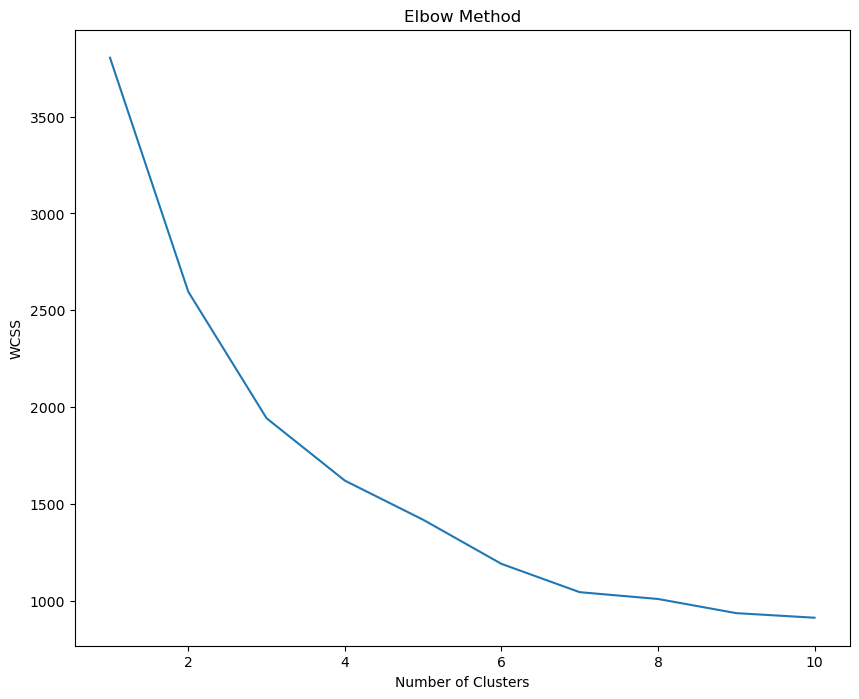

In [41]:
# finding the optimal number of cluster using elbow method for KMeans clustering
fig = plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(minmax_scaled_data)
    wcss.append(kmeans.inertia_)    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
# 5 clusters are seem to be optimal

In [43]:
# building model with 5 clusters on standard scaled data
clusters_kmeans = KMeans(n_clusters=5)
y_kmeans = clusters_kmeans.fit_predict(minmax_scaled_data)

In [44]:
clusters_kmeans.labels_

array([1, 1, 1, ..., 3, 4, 1])

In [45]:
y_kmeans

array([1, 1, 1, ..., 3, 4, 1])

In [46]:
clusters_kmeans.cluster_centers_

array([[ 5.30046093e-01,  8.19797996e-03,  6.12778731e-01,
         2.57289880e-03,  7.71869640e-03,  5.06536176e-01,
         4.34819897e-01,  5.91364580e-02,  6.20926244e-02,
         5.44755534e-01,  5.55111512e-17],
       [ 1.58931114e-01,  5.47773269e-03,  2.15989684e-02,
         9.34880722e-03,  1.61186331e-04,  4.88947545e-02,
         1.54195935e-01,  9.96054405e-03,  2.03739523e-02,
         4.26640124e-01,  1.55431223e-15],
       [ 5.22926459e-01,  3.61994989e-02,  4.34983221e-01,
         1.09060403e-02,  7.55033557e-03,  5.05530254e-01,
         5.13820205e-01,  8.68110637e-01,  8.73489933e-01,
         5.75336258e-01,  9.79865772e-01],
       [ 2.88683739e-01,  1.15216811e-02,  4.07748049e-01,
         5.57413601e-03,  3.34448161e-03,  3.83686016e-01,
         3.42193276e-01,  5.22955306e-02,  6.77814939e-02,
         5.46231860e-01,  1.00000000e+00],
       [ 3.47057046e-01,  1.75509223e-02,  1.17250674e-01,
         4.04312668e-03, -1.30104261e-18,  1.41441808e-01,
  

In [47]:
clusters_kmeans.inertia_

1376.4192495327416

In [48]:
# create copy of data and storing the cluster values in seperate column
data_kmeans = data.copy()
data_kmeans['clusters_kmeans'] = clusters_kmeans.labels_

In [49]:
data_kmeans.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,clusters_kmeans
0,28143.0,0,1,1,1,174.0,1.0,0.0,0.0,7000,0,1
1,19244.0,0,1,1,1,215.0,2.0,0.0,0.0,6968,0,1


In [50]:
# checking the mean
data_kmeans.groupby('clusters_kmeans').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
clusters_kmeans,,,,,,,,,,,
0,107568.942010,88.549828,3.455326,1.005155,1.030928,29238.354381,16.536082,46.427835,0.155498,4515.482818,0.000000
1,32398.532700,62.150773,1.086340,1.018686,1.000644,2822.526418,5.861469,7.801546,0.050902,3542.954253,0.000000
2,106264.473993,403.552013,2.739933,1.021812,1.030201,29144.766988,19.525168,680.381711,2.183725,4773.838926,0.979866
3,58663.747352,128.443701,2.630992,1.011148,1.013378,22120.218227,13.003344,40.986622,0.169454,4532.447046,1.000000
4,70525.852763,195.657682,1.469003,1.008086,1.000000,8154.385445,10.374663,631.264825,2.001348,3857.231806,0.000000


In [51]:
# checking the number of values for each unique value
data_kmeans['clusters_kmeans'].value_counts()

clusters_kmeans
1    1552
3     897
2     596
0     582
4     371
Name: count, dtype: int64

In [52]:
# checking the silhouette score
silhouette_score(minmax_scaled_data, clusters_kmeans.labels_)

0.36513007973128575

Text(0.5, 1.0, 'Clusters using KMeans')

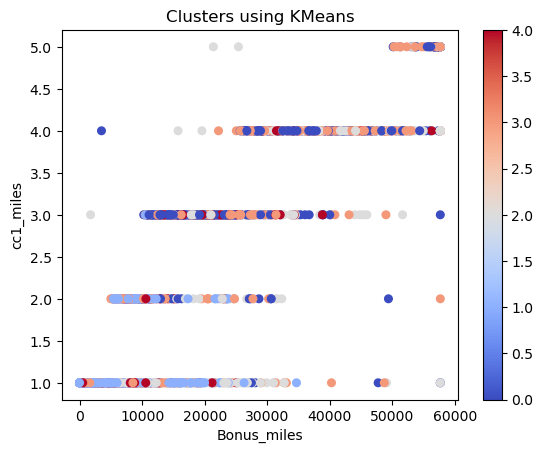

In [53]:
data_kmeans.plot(x="Bonus_miles",y ="cc1_miles",c=clusters_kmeans.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm)
plt.title('Clusters using KMeans')

Text(0.5, 1.0, 'Clusters using KMeans')

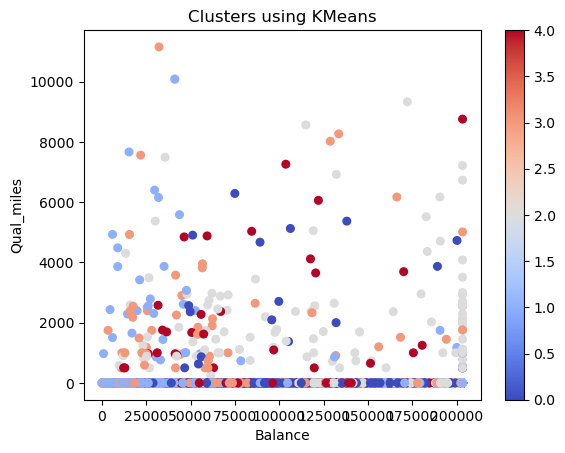

In [186]:
data_kmeans.plot(x="Balance",y ="Qual_miles",c=clusters_kmeans.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm)
plt.title('Clusters using KMeans')

In [54]:
wcss

[3803.692598953362,
 2596.25655500266,
 1943.390990876764,
 1621.5607276952855,
 1419.6037663978796,
 1192.0149302445986,
 1045.8679720794025,
 1010.7714124490248,
 937.6828818808946,
 914.058275555192]

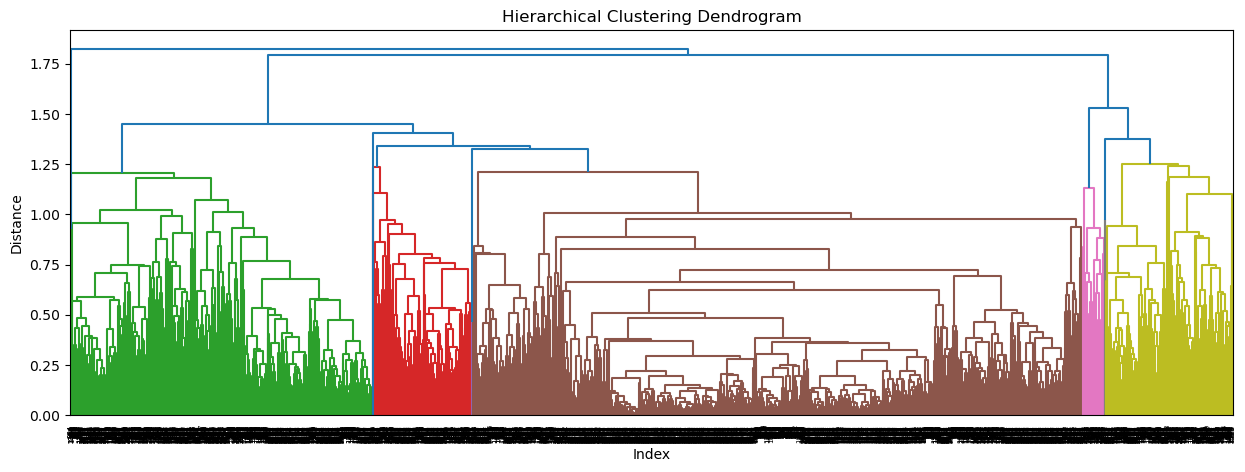

In [55]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch # for creating dendrogram
z = linkage(minmax_scaled_data, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()

In [56]:
from sklearn.cluster import AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters=5, linkage='average',metric = "euclidean").fit(minmax_scaled_data)

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
data_h_avg = data.copy()
data_h_avg['clusters_h_avg'] = cluster_labels
data_h_avg

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,clusters_h_avg
0,28143.0,0,1,1,1,174.0,1.0,0.00,0.0,7000,0,0
1,19244.0,0,1,1,1,215.0,2.0,0.00,0.0,6968,0,0
2,41354.0,0,1,1,1,4123.0,4.0,0.00,0.0,7034,0,0
3,14776.0,0,1,1,1,500.0,1.0,0.00,0.0,6952,0,0
4,97752.0,0,4,1,1,43300.0,26.0,783.75,2.5,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,18476.0,0,1,1,1,8525.0,4.0,200.00,1.0,1403,1,1
3994,64385.0,0,1,1,1,981.0,5.0,0.00,0.0,1395,1,1
3995,73597.0,0,3,1,1,25447.0,8.0,0.00,0.0,1402,1,1
3996,54899.0,0,1,1,1,500.0,1.0,500.00,1.0,1401,0,0


In [57]:
data_h_avg.groupby("clusters_h_avg").mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
clusters_h_avg,,,,,,,,,,,
0,52962.581424,82.448854,1.632570,1.014321,1.006547,8906.341960,8.734861,98.625614,0.334083,3783.539280,0.0
1,65707.336909,139.211186,2.702025,1.009643,1.000964,23307.215043,13.588235,93.539296,0.358245,4537.515911,1.0
2,103142.355159,479.294785,2.557823,1.029478,1.034014,27752.922902,19.873016,761.603741,2.385488,4825.263039,1.0
3,50703.000000,0.000000,4.000000,1.000000,4.666667,57651.875000,24.000000,0.000000,0.000000,5457.333333,1.0
4,161517.825342,261.342466,4.150685,1.000000,1.082192,45013.708904,21.863014,571.126712,1.719178,5093.630137,0.0


In [58]:
data_h_avg['clusters_h_avg'].value_counts()

clusters_h_avg
0    2444
1    1037
2     441
4      73
3       3
Name: count, dtype: int64

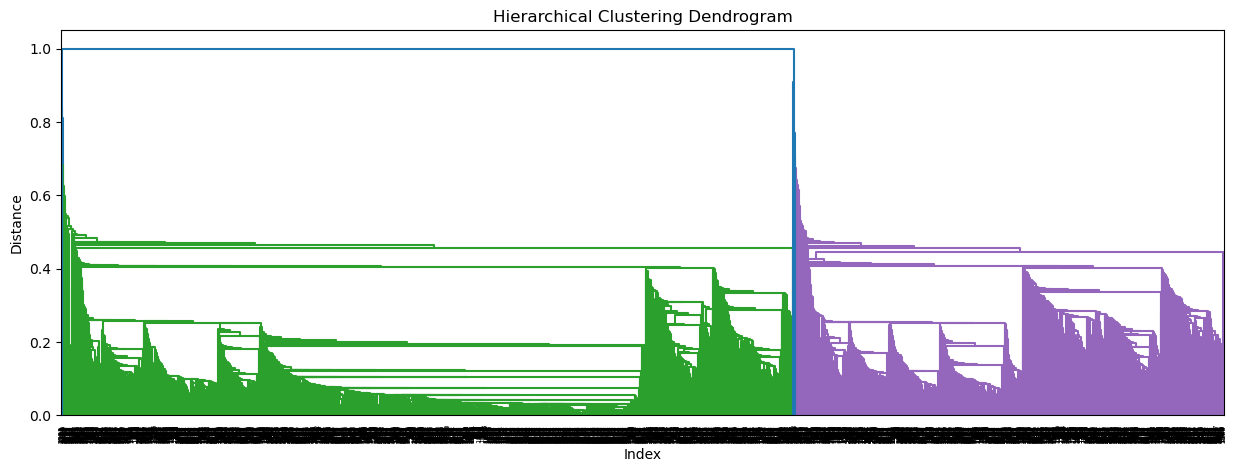

In [59]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch # for creating dendrogram
z = linkage(minmax_scaled_data, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()

In [60]:
from sklearn.cluster import AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters=3, linkage='single',metric = "euclidean").fit(minmax_scaled_data)

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
data_h_sin = data.copy()
data_h_sin['clusters_h_sin'] = cluster_labels
data_h_sin

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,clusters_h_sin
0,28143.0,0,1,1,1,174.0,1.0,0.00,0.0,7000,0,0
1,19244.0,0,1,1,1,215.0,2.0,0.00,0.0,6968,0,0
2,41354.0,0,1,1,1,4123.0,4.0,0.00,0.0,7034,0,0
3,14776.0,0,1,1,1,500.0,1.0,0.00,0.0,6952,0,0
4,97752.0,0,4,1,1,43300.0,26.0,783.75,2.5,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,18476.0,0,1,1,1,8525.0,4.0,200.00,1.0,1403,1,2
3994,64385.0,0,1,1,1,981.0,5.0,0.00,0.0,1395,1,2
3995,73597.0,0,3,1,1,25447.0,8.0,0.00,0.0,1402,1,2
3996,54899.0,0,1,1,1,500.0,1.0,500.00,1.0,1401,0,0


In [61]:
data_h_sin.groupby('clusters_h_sin').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
clusters_h_sin,,,,,,,,,,,
0,56110.985399,87.637267,1.705602,1.013905,1.008741,9953.556019,9.115614,112.329460,0.374255,3821.535558,0.0
1,15835.000000,0.000000,2.000000,1.000000,5.000000,57651.875000,16.000000,0.000000,0.000000,5825.000000,1.0
2,76865.243919,240.358784,2.662162,1.015541,1.015541,24678.327534,15.480405,292.478041,0.961824,4624.251351,1.0


In [62]:
data_h_sin['clusters_h_sin'].value_counts()

clusters_h_sin
0    2517
2    1480
1       1
Name: count, dtype: int64

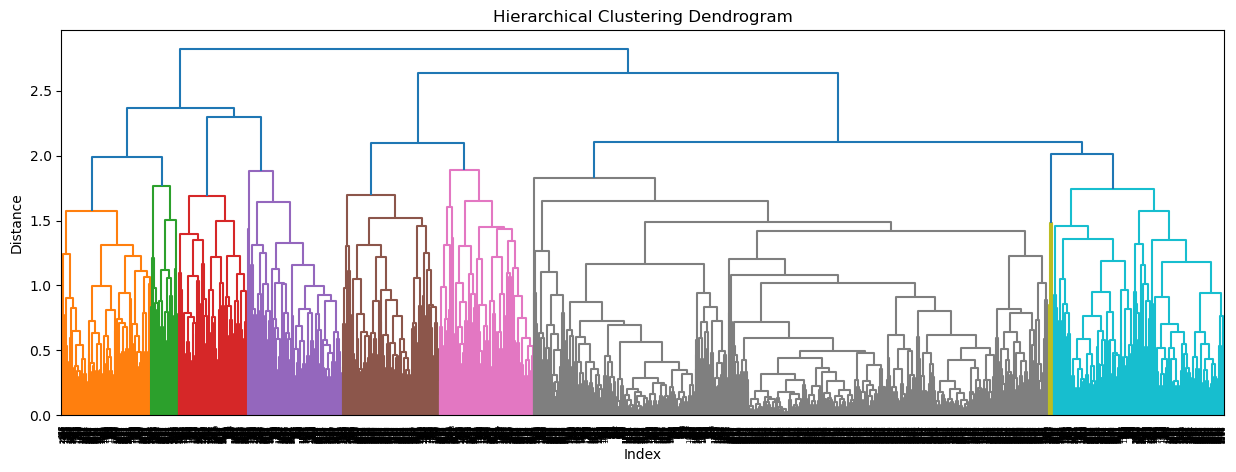

In [63]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch # for creating dendrogram
z = linkage(minmax_scaled_data, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()

In [64]:
from sklearn.cluster import AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters=9, linkage='complete',metric = "euclidean").fit(minmax_scaled_data)

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
data_h_com = data.copy()
data_h_com['clusters_h_com'] = cluster_labels
data_h_com

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,clusters_h_com
0,28143.0,0,1,1,1,174.0,1.0,0.00,0.0,7000,0,2
1,19244.0,0,1,1,1,215.0,2.0,0.00,0.0,6968,0,2
2,41354.0,0,1,1,1,4123.0,4.0,0.00,0.0,7034,0,2
3,14776.0,0,1,1,1,500.0,1.0,0.00,0.0,6952,0,2
4,97752.0,0,4,1,1,43300.0,26.0,783.75,2.5,6935,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,18476.0,0,1,1,1,8525.0,4.0,200.00,1.0,1403,1,3
3994,64385.0,0,1,1,1,981.0,5.0,0.00,0.0,1395,1,3
3995,73597.0,0,3,1,1,25447.0,8.0,0.00,0.0,1402,1,3
3996,54899.0,0,1,1,1,500.0,1.0,500.00,1.0,1401,0,6


In [65]:
data_h_com.groupby('clusters_h_com').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
clusters_h_com,,,,,,,,,,,
0,87723.097136,444.820433,1.123839,1.040248,1.006192,10177.289474,12.430341,641.854489,2.106811,4367.588235,1.0000
1,89558.671012,121.260736,4.361963,1.000000,1.070552,47316.267255,18.953988,90.092025,0.355828,5033.411043,1.0000
2,38275.589659,68.933973,1.296840,1.007336,1.004515,4702.192932,7.034424,8.709368,0.053894,3613.150113,0.0000
3,48520.390572,139.764505,2.022184,1.001706,1.000000,12673.436860,11.293515,31.020478,0.136519,4331.675768,1.0000
4,115489.937238,379.167364,4.037657,1.000000,1.008368,43420.828452,25.154812,744.771967,2.288703,5106.548117,1.0000
5,119523.378989,202.957447,3.808511,1.000000,1.063830,37666.988032,19.670213,512.587766,1.521277,3949.712766,0.0000
6,65047.834084,202.621622,1.285285,1.009009,1.000000,6064.423423,9.696697,636.297297,2.028529,3868.633634,0.0000
7,41908.062500,0.000000,1.000000,2.687500,1.000000,12815.750000,14.500000,25.000000,0.125000,4481.125000,0.4375
8,129614.935275,38.449838,3.883495,1.003236,1.025890,35665.403722,17.061489,22.103560,0.084142,4933.152104,0.0000


In [66]:
data_h_com['clusters_h_com'].value_counts()

clusters_h_com
2    1772
3     586
6     333
1     326
0     323
8     309
4     239
5      94
7      16
Name: count, dtype: int64

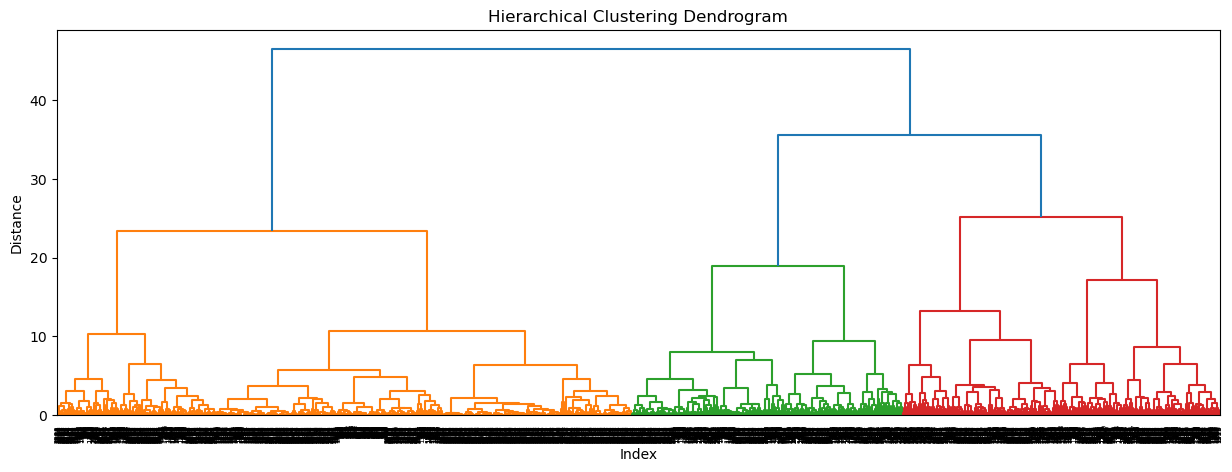

In [67]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch # for creating dendrogram
z = linkage(minmax_scaled_data, method="ward",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()

In [68]:
from sklearn.cluster import AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters=3, linkage='ward',metric = "euclidean").fit(minmax_scaled_data)

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
data_h_war = data.copy()
data_h_war['clusters_h_war'] = cluster_labels
data_h_war

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,clusters_h_war
0,28143.0,0,1,1,1,174.0,1.0,0.00,0.0,7000,0,1
1,19244.0,0,1,1,1,215.0,2.0,0.00,0.0,6968,0,1
2,41354.0,0,1,1,1,4123.0,4.0,0.00,0.0,7034,0,1
3,14776.0,0,1,1,1,500.0,1.0,0.00,0.0,6952,0,1
4,97752.0,0,4,1,1,43300.0,26.0,783.75,2.5,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,18476.0,0,1,1,1,8525.0,4.0,200.00,1.0,1403,1,0
3994,64385.0,0,1,1,1,981.0,5.0,0.00,0.0,1395,1,2
3995,73597.0,0,3,1,1,25447.0,8.0,0.00,0.0,1402,1,2
3996,54899.0,0,1,1,1,500.0,1.0,500.00,1.0,1401,0,0


In [69]:
data_h_war.groupby('clusters_h_war').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
clusters_h_war,,,,,,,,,,,
0,88507.410041,299.825368,2.028493,1.015625,1.007353,17666.062500,14.363051,601.352022,1.956801,4319.740809,0.504596
1,49971.354398,65.773003,1.682508,1.015672,1.008089,9358.202035,8.489383,0.589990,0.003033,3771.920627,0.000000
2,64236.421808,128.760730,2.896996,1.010730,1.026824,25647.508047,14.433476,64.552307,0.247318,4622.086910,1.000000


In [70]:
data_h_war['clusters_h_war'].value_counts()

clusters_h_war
1    1978
0    1088
2     932
Name: count, dtype: int64

In [71]:
from sklearn.neighbors import NearestNeighbors

In [72]:
neigh = NearestNeighbors(n_neighbors=22)
nbrs = neigh.fit(minmax_scaled_data)
distances, indices = nbrs.kneighbors(minmax_scaled_data)

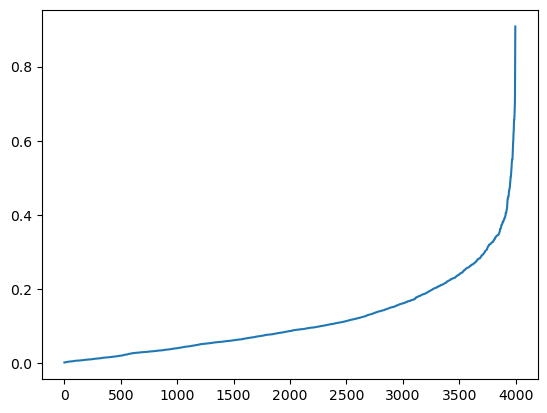

In [73]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [166]:
dbscan = DBSCAN(eps=0.5, min_samples=12)
dbscan.fit(minmax_scaled_data)

DBSCAN(min_samples=12)

In [167]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [170]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [172]:
cl
#pd.set_option("display.max_rows", None)

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3993,1
3994,1
3995,1
3996,0


In [174]:
cl

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3993,1
3994,1
3995,1
3996,0


In [176]:
df1 = pd.concat([data,cl],axis=1)
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,cluster
0,28143.0,0,1,1,1,174.0,1.0,0.00,0.0,7000,0,0
1,19244.0,0,1,1,1,215.0,2.0,0.00,0.0,6968,0,0
2,41354.0,0,1,1,1,4123.0,4.0,0.00,0.0,7034,0,0
3,14776.0,0,1,1,1,500.0,1.0,0.00,0.0,6952,0,0
4,97752.0,0,4,1,1,43300.0,26.0,783.75,2.5,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,18476.0,0,1,1,1,8525.0,4.0,200.00,1.0,1403,1,1
3994,64385.0,0,1,1,1,981.0,5.0,0.00,0.0,1395,1,1
3995,73597.0,0,3,1,1,25447.0,8.0,0.00,0.0,1402,1,1
3996,54899.0,0,1,1,1,500.0,1.0,500.00,1.0,1401,0,0


Text(0.5, 1.0, 'Clusters using DBScan')

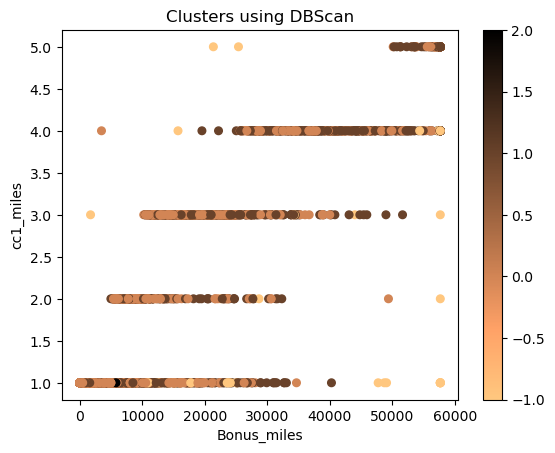

In [178]:
df1.plot(x="Bonus_miles",y ="cc1_miles",c=dbscan.labels_ ,kind="scatter",s=30 ,cmap=plt.cm.copper_r)
plt.title('Clusters using DBScan')

In [180]:
dl = dbscan.labels_

In [182]:
silhouette_score(minmax_scaled_data, dl)

0.03518777903474284

Text(0.5, 1.0, 'Clusters using DBScan')

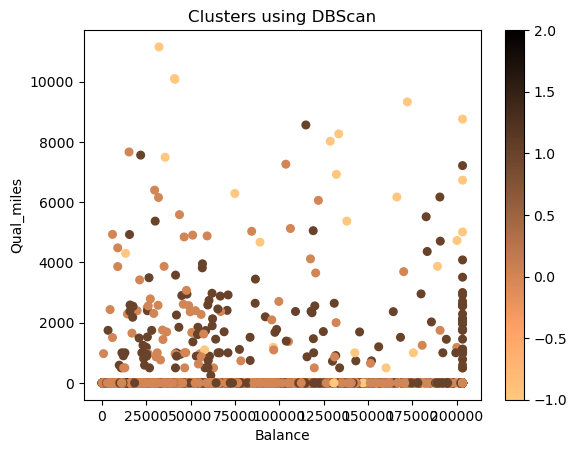

In [184]:
df1.plot(x="Balance",y ="Qual_miles",c=dbscan.labels_ ,kind="scatter",s=30 ,cmap=plt.cm.copper_r)
plt.title('Clusters using DBScan')

min_samples: 2, Silhouette Score: -0.13695765133112767
min_samples: 3, Silhouette Score: -0.06461566085989995
min_samples: 4, Silhouette Score: -0.038713497467134865
min_samples: 5, Silhouette Score: 0.032519231192012804
min_samples: 6, Silhouette Score: 0.032522393958712585
min_samples: 7, Silhouette Score: 0.03246575985384066
min_samples: 8, Silhouette Score: 0.03551553855260433
min_samples: 9, Silhouette Score: 0.03551553855260433
min_samples: 10, Silhouette Score: 0.03572295544142771
min_samples: 11, Silhouette Score: 0.03518777903474284
min_samples: 12, Silhouette Score: 0.03518777903474284
min_samples: 13, Silhouette Score: 0.3287789610160222
min_samples: 14, Silhouette Score: 0.3274750891333574
min_samples: 15, Silhouette Score: 0.3269320379094507
min_samples: 16, Silhouette Score: 0.3249534486237953
min_samples: 17, Silhouette Score: 0.3227788135114577
min_samples: 18, Silhouette Score: 0.3220781455005316
min_samples: 19, Silhouette Score: 0.3200254914760207


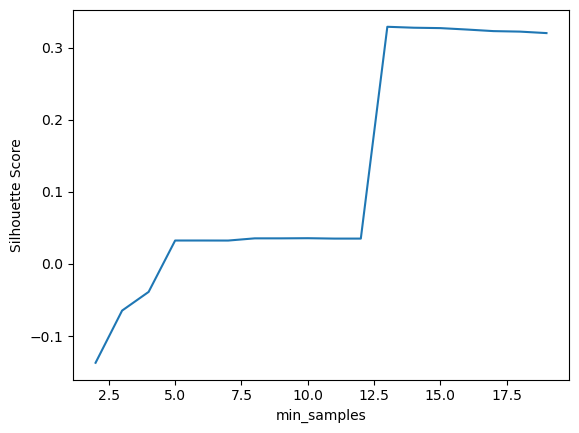

In [202]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps = 0.5  # This should be chosen based on the k-NN distances plot
silhouette_scores = []

for min_samples in range(2, 20):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(minmax_scaled_data)
    
    # Ignore the case where all points are labeled as noise (-1)
    if len(set(labels)) > 1:
        score = silhouette_score(minmax_scaled_data, labels)
        silhouette_scores.append((min_samples, score))
        print(f'min_samples: {min_samples}, Silhouette Score: {score}')
    else:
        silhouette_scores.append((min_samples, -1))  # To handle case with all noise points

# Plot silhouette scores
min_samples_values, scores = zip(*silhouette_scores)
plt.plot(min_samples_values, scores)
plt.xlabel('min_samples')
plt.ylabel('Silhouette Score')
plt.show()

min_samples: 2, Silhouette Score: -0.13652652219494332
min_samples: 3, Silhouette Score: -0.06389473522191977
min_samples: 4, Silhouette Score: -0.038397197444377376
min_samples: 5, Silhouette Score: 0.032973643643241395
min_samples: 6, Silhouette Score: 0.032915537056933765
min_samples: 7, Silhouette Score: 0.035474547462406754
min_samples: 8, Silhouette Score: 0.035474547462406754
min_samples: 9, Silhouette Score: 0.035474547462406754
min_samples: 10, Silhouette Score: 0.03429040924937246
min_samples: 11, Silhouette Score: 0.033394348555585755
min_samples: 12, Silhouette Score: 0.0319703541733223
min_samples: 13, Silhouette Score: 0.3234991919369371
min_samples: 14, Silhouette Score: 0.3232867502355032
min_samples: 15, Silhouette Score: 0.3222527876258809
min_samples: 16, Silhouette Score: 0.3187533174108986
min_samples: 17, Silhouette Score: 0.318103111057109
min_samples: 18, Silhouette Score: 0.2839538543489294
min_samples: 19, Silhouette Score: 0.2835463988913036


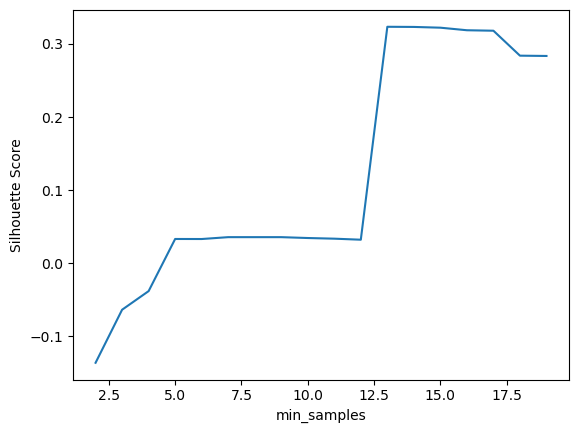

In [219]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps = 0.485  # This should be chosen based on the k-NN distances plot
silhouette_scores = []

for min_samples in range(2, 20):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(minmax_scaled_data)
    
    # Ignore the case where all points are labeled as noise (-1)
    if len(set(labels)) > 1:
        score = silhouette_score(minmax_scaled_data, labels)
        silhouette_scores.append((min_samples, score))
        print(f'min_samples: {min_samples}, Silhouette Score: {score}')
    else:
        silhouette_scores.append((min_samples, -1))  # To handle case with all noise points

# Plot silhouette scores
min_samples_values, scores = zip(*silhouette_scores)
plt.plot(min_samples_values, scores)
plt.xlabel('min_samples')
plt.ylabel('Silhouette Score')
plt.show()

min_samples: 2, Silhouette Score: 0.13037962742461653
min_samples: 3, Silhouette Score: 0.2771323553754974
min_samples: 4, Silhouette Score: 0.3323739437797708
min_samples: 5, Silhouette Score: 0.33068894573073476
min_samples: 6, Silhouette Score: 0.33035468438476223
min_samples: 7, Silhouette Score: 0.33035468438476223
min_samples: 8, Silhouette Score: 0.3299794872584579
min_samples: 9, Silhouette Score: 0.3336365785076996
min_samples: 10, Silhouette Score: 0.3335554157420223
min_samples: 11, Silhouette Score: 0.3331043251168239
min_samples: 12, Silhouette Score: 0.33266850751462446
min_samples: 13, Silhouette Score: 0.3318778498172706
min_samples: 14, Silhouette Score: 0.33239847986716503
min_samples: 15, Silhouette Score: 0.330958237161332
min_samples: 16, Silhouette Score: 0.33043262052930256
min_samples: 17, Silhouette Score: 0.32859279973881916
min_samples: 18, Silhouette Score: 0.32837918733996957
min_samples: 19, Silhouette Score: 0.327800187406904


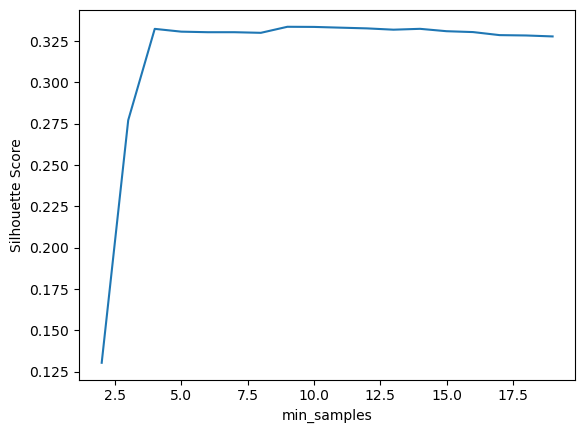

In [218]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps = 0.515  # This should be chosen based on the k-NN distances plot
silhouette_scores = []

for min_samples in range(2, 20):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(minmax_scaled_data)
    
    # Ignore the case where all points are labeled as noise (-1)
    if len(set(labels)) > 1:
        score = silhouette_score(minmax_scaled_data, labels)
        silhouette_scores.append((min_samples, score))
        print(f'min_samples: {min_samples}, Silhouette Score: {score}')
    else:
        silhouette_scores.append((min_samples, -1))  # To handle case with all noise points

# Plot silhouette scores
min_samples_values, scores = zip(*silhouette_scores)
plt.plot(min_samples_values, scores)
plt.xlabel('min_samples')
plt.ylabel('Silhouette Score')
plt.show()